In [1]:
import os
import glob
from pathlib import Path
l_path = Path('C:/Users/Student/Downloads/archive/archive/label/')
i_path = Path('C:/Users/Student/Downloads/archive/archive/images/')

labels_path = list(l_path.glob('*.xml'))
print(len(labels_path))

images_path_all = glob.glob('images/*/*.jpg')
len(images_path_all)

images_path = []
classes = ['punching_hole', 'welding_line', 'crescent_gap', 'water_spot', 'oil_spot', 'silk_spot', 'inclusion', 'rolled_pit', 'crease', 'waist folding']
class_list = []
for img in i_path.rglob("*.jpg"):
    for label in l_path.glob("*.xml"):
        #print(img.stem, label.stem)
        if img.stem == label.stem:
            images_path.append(img)
            for c in range(10):
                flag = False
                if classes[c] in str(img):
                    flag = True
                    class_list.append(c)
                    break
            if flag == False:
                print(img)
len(images_path)

2280


2280

In [2]:
len(labels_path), len(images_path), len(class_list)

(2280, 2280, 2280)

In [3]:
images_path = sorted(images_path, key=lambda x: x.stem)
labels_path = sorted(labels_path, key=lambda x: x.stem)

In [9]:
pip install -U scikit-learn

     ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
     --------------------------------------- 0.0/10.6 MB 487.6 kB/s eta 0:00:22
     --------------------------------------- 0.1/10.6 MB 871.5 kB/s eta 0:00:13
      --------------------------------------- 0.2/10.6 MB 1.0 MB/s eta 0:00:11
      --------------------------------------- 0.3/10.6 MB 1.4 MB/s eta 0:00:08
     - -------------------------------------- 0.4/10.6 MB 1.9 MB/s eta 0:00:06
     -- ------------------------------------- 0.5/10.6 MB 2.1 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/10.6 MB 2.3 MB/s eta 0:00:05
     --- ------------------------------------ 0.8/10.6 MB 2.6 MB/s eta 0:00:04
     --- ------------------------------------ 1.0/10.6 MB 2.6 MB/s eta 0:00:04
     ---- ----------------------------------- 1.1/10.6 MB 2.7 MB/s eta 0:00:04
     ---- ----------------------------------- 1.2/10.6 MB 2.9 MB


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from sklearn.model_selection import train_test_split

images_path_train, images_path_test, labels_path_train, labels_path_test = train_test_split(images_path, labels_path, test_size=0.15, stratify = class_list)
class_list_train_val = []
for img in images_path_train:
    for c in range(10):
        if classes[c] in str(img):
            class_list_train_val.append(c)
            
#print(len(images_path_train), len(class_list_train_val))
images_path_train, images_path_val, labels_path_train, labels_path_val = train_test_split(images_path_train, labels_path_train, test_size=0.15, stratify = class_list_train_val)

In [5]:
len(images_path_train), len(labels_path_train), len(images_path_test), len(labels_path_test), len(images_path_val), len(labels_path_val)

(1647, 1647, 342, 342, 291, 291)

In [6]:
for label in labels_path_train:
    is_found = False
    for img in images_path_train:
        if img.stem == label.stem:
            is_found = True
            #print(img.name, label.name)
            break
    assert is_found

In [7]:
#convert xml to json

category_list = []
for c_id in range(10):
    ctgr_dict = {
        "id": c_id,
        "name": classes[c_id],
        "supercategory": "none"
    }
    category_list.append(ctgr_dict)
print(category_list)




[{'id': 0, 'name': 'punching_hole', 'supercategory': 'none'}, {'id': 1, 'name': 'welding_line', 'supercategory': 'none'}, {'id': 2, 'name': 'crescent_gap', 'supercategory': 'none'}, {'id': 3, 'name': 'water_spot', 'supercategory': 'none'}, {'id': 4, 'name': 'oil_spot', 'supercategory': 'none'}, {'id': 5, 'name': 'silk_spot', 'supercategory': 'none'}, {'id': 6, 'name': 'inclusion', 'supercategory': 'none'}, {'id': 7, 'name': 'rolled_pit', 'supercategory': 'none'}, {'id': 8, 'name': 'crease', 'supercategory': 'none'}, {'id': 9, 'name': 'waist folding', 'supercategory': 'none'}]


In [8]:
#чтобы не перебирать images_path в поисках image_id
# images_path = sorted(images_path, key=lambda x: x.stem)
# annotations_path = l_path.glob("*.xml")
# annotations_path = sorted(annotations_path, key=lambda x: x.stem)

images_path_train = sorted(images_path_train, key=lambda x: x.stem)
annotations_path_train = labels_path_train
annotations_path_train = sorted(annotations_path_train, key=lambda x: x.stem)

images_path_val = sorted(images_path_val, key=lambda x: x.stem)
annotations_path_val = labels_path_val
annotations_path_val = sorted(annotations_path_val, key=lambda x: x.stem)

images_path_test = sorted(images_path_test, key=lambda x: x.stem)
annotations_path_test = labels_path_test
annotations_path_test = sorted(annotations_path_test, key=lambda x: x.stem)

In [9]:
# def collect_images_text(images_path):
#     img_id = 0
#     images_text = '"images": ['
#     for img in images_path:
#         images_text += '\n' + '    {' + f'''
#             "id": {img_id},
#             "file_name": "{img.stem + '.jpg'}",
#             "height": 1000,
#             "width": 2048
#         '''
#         img_id += 1
#         if img_id == len(images_path):
#             images_text += '}'
#         else:
#             images_text += '},'
#     images_text += '\n],' + '\n'
#     return images_text
#print(images_text)
def collect_images(images_path):
    images_list = []
    img_id = 0
    for img in images_path:
        img_dict = {
            "id": img_id,
            "file_name": f"{img.stem}.jpg",
            "height": 1000,
            "width": 2048
        }
        images_list.append(img_dict)
        img_id += 1
    return images_list


In [10]:
images_text_train = collect_images(images_path_train)
images_text_test = collect_images(images_path_test)
images_text_val = collect_images(images_path_val)

In [11]:
import xml.etree.ElementTree as ET
import re

def collect_annotation(annotations_path):
    an_id = 0
    annotation_list = []
    image_id = 0
    for a in annotations_path:
        tree = ET.parse(a)
        root = tree.getroot()
#         print(image_id)
#         print(im_list[image_id]['file_name'][:-4])
#        assert im_list[image_id]["file_name"][:-4] == a.stem, f"{image_id} - {im_list[image_id]['file_name'][:-4]} != {a.stem}"
        for object_element in root.findall(".//object"):
            #an_id += 1
            
            name_element = object_element.find("name")

            match = re.search(r'\d+', name_element.text)

            if match:
                category_id = int(match.group()) - 1

                bndbox_element = object_element.find("bndbox")

                xmin = int(bndbox_element.find("xmin").text)
                ymin = int(bndbox_element.find("ymin").text)
                xmax = int(bndbox_element.find("xmax").text)
                ymax = int(bndbox_element.find("ymax").text)

                width = (xmax - xmin)
                height = (ymax - ymin)
                
                annotation_dict = {
                    "id": an_id,
                    "image_id": image_id,
                    "category_id": category_id,
                    "bbox": [ xmin, ymin, width, height ],
                    "area": width*height,
                    "segmentation": [],
                    "iscrowd": 0}
                an_id += 1
                annotation_list.append(annotation_dict)
        image_id += 1
    #an_text = annotation_text[:-1]
    #an_text += '\n]'
    return annotation_list
    #print(an_text)

In [12]:
annotation_text_train = collect_annotation(annotations_path_train)
annotation_text_val = collect_annotation(annotations_path_val)
annotation_text_test = collect_annotation(annotations_path_test)

In [13]:
import json
annotation_file_name = 'dataset.json'

coco_data_train = {
    "categories": category_list,
    "images": images_text_train,
    "annotations": annotation_text_train
}

coco_data_test = {
    "categories": category_list,
    "images": images_text_test,
    "annotations": annotation_text_test
}

coco_data_val = {
    "categories": category_list,
    "images": images_text_val,
    "annotations": annotation_text_val
}
# data_train = category_list + images_text_train + annotation_text_train
# data_val = category_list + images_text_val + annotation_text_val
# data_test = category_list + images_text_test + annotation_text_test

import shutil

train_directory = Path("C:/Users/Student/Documents/Diana/train")
train_directory.mkdir(exist_ok=True)
test_directory = Path("C:/Users/Student/Documents/Diana/test")
test_directory.mkdir(exist_ok=True)
val_directory = Path("C:/Users/Student/Documents/Diana/val")
val_directory.mkdir(exist_ok=True)

with open(str(train_directory) + '/' + annotation_file_name, 'w') as json_file:
    json.dump(coco_data_train, json_file)

with open(str(val_directory) + '/' + annotation_file_name, 'w') as json_file:
    json.dump(coco_data_val, json_file)
    
with open(str(test_directory) + '/' + annotation_file_name, 'w') as json_file:
    json.dump(coco_data_test, json_file)

In [22]:
pip install opencv-python

     ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.6 MB 1.4 MB/s eta 0:00:29
     --------------------------------------- 0.1/38.6 MB 825.8 kB/s eta 0:00:47
     ---------------------------------------- 0.1/38.6 MB 1.1 MB/s eta 0:00:35
     ---------------------------------------- 0.2/38.6 MB 1.3 MB/s eta 0:00:30
     ---------------------------------------- 0.3/38.6 MB 1.6 MB/s eta 0:00:24
      --------------------------------------- 0.5/38.6 MB 2.2 MB/s eta 0:00:18
      --------------------------------------- 0.6/38.6 MB 2.3 MB/s eta 0:00:17
      --------------------------------------- 0.8/38.6 MB 2.8 MB/s eta 0:00:14
      --------------------------------------- 0.9/38.6 MB 2.7 MB/s eta 0:00:14
     - -------------------------------------- 1.0/38.6 MB 3.0 MB/s eta 0:00:13
     - -------------------------------------- 1.2/38.6 MB 3.2 MB/s eta 0:00:12
     - -------------------------------------- 1.3/38.6 MB 


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from typing import Union
from pathlib import Path
import shutil
import cv2

import numpy as np

def convert_to_three_channel(image):
    three_channel_image = np.stack([image] * 3, axis=-1)
    return three_channel_image

def copy_files(files: list, dst: Union[str, Path]):
    dst_path = Path(dst)
#     dst_path.mkdir(exist_ok=True)
    
    for file in files:
        image = cv2.imread(str(file), cv2.IMREAD_GRAYSCALE)
        
        three_channel_image = convert_to_three_channel(image)
        
        new_file_path = dst_path / file.name
        
        cv2.imwrite(str(new_file_path), three_channel_image)

copy_files(images_path_train, train_directory)
copy_files(images_path_val, val_directory)
copy_files(images_path_test, test_directory)


# from typing import Union
# # картинки
# def copy_files(files: list, dst: Union[str, Path]):
# #     dst_path = Path(dst)
# #     dst_path.mkdir(exist_ok=True)
    
#     for file in files:
#         shutil.copy(file, dst)

# copy_files(images_path_train, train_directiry)
# copy_files(images_path_val, val_directiry)
# copy_files(images_path_test, test_directiry)

In [ ]:
# from PIL import Image


# image = Image.open("/kaggle/working/train/img_03_3403402900_00962.jpg")


# num_channels = image.mode
# print("Number of channels:", num_channels)


In [18]:
pip install pycocotools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install transformers

     ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.0 MB 1.3 MB/s eta 0:00:08
     ---------------------------------------- 0.0/9.0 MB 1.3 MB/s eta 0:00:08
      --------------------------------------- 0.1/9.0 MB 939.4 kB/s eta 0:00:10
      --------------------------------------- 0.1/9.0 MB 939.4 kB/s eta 0:00:10
      --------------------------------------- 0.2/9.0 MB 1.1 MB/s eta 0:00:08
     - -------------------------------------- 0.3/9.0 MB 1.4 MB/s eta 0:00:07
     - -------------------------------------- 0.4/9.0 MB 1.7 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/9.0 MB 2.0 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/9.0 MB 2.1 MB/s eta 0:00:05
     --- ------------------------------------ 0.8/9.0 MB 2.2 MB/s eta 0:00:04
     ---- ----------------------------------- 0.9/9.0 MB 2.3 MB/s eta 0:00:04
     ---- ----------------------------------- 1.0/9.0 MB 2.5 MB/s e


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import transformers
from transformers import DetrImageProcessor
#import pytorch_lighting
import torch
import torchvision

class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, image_directory_path, image_processor, train: bool = True):
        annotation_file_path = os.path.join(image_directory_path, annotation_file_name)
        super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
        self.image_processor = image_processor
        
    def __getitem__(self, idx):
        img, target = super(CocoDetection, self).__getitem__(idx)

        image_id = self.ids[idx]
        target = {'image_id': image_id, 'annotations': target}
        encoding = self.image_processor(images=img, annotations=target, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        #print('pixel_values', pixel_values)
        target = encoding["labels"][0]
        #print('target', target)

        return pixel_values, target
    
    
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

dataset_path = 'C:/Users/Student/Documents/Diana'

# trn_dir = os.path.join('/kaggle/working/', 'train')
# vl_dir = '/kaggle/working/val'
# tst_dir = '/kaggle/working/test'

train_dataset = CocoDetection(image_directory_path = train_directory, image_processor = processor, train = True)
val_dataset = CocoDetection(image_directory_path = val_directory, image_processor = processor, train = False)
test_dataset = CocoDetection(image_directory_path = test_directory, image_processor = processor, train = False)

print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(val_dataset))
print("Number of test examples:", len(test_dataset))


C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Number of training examples: 1647
Number of validation examples: 291
Number of test examples: 342


Image n°275
222 7 301 941


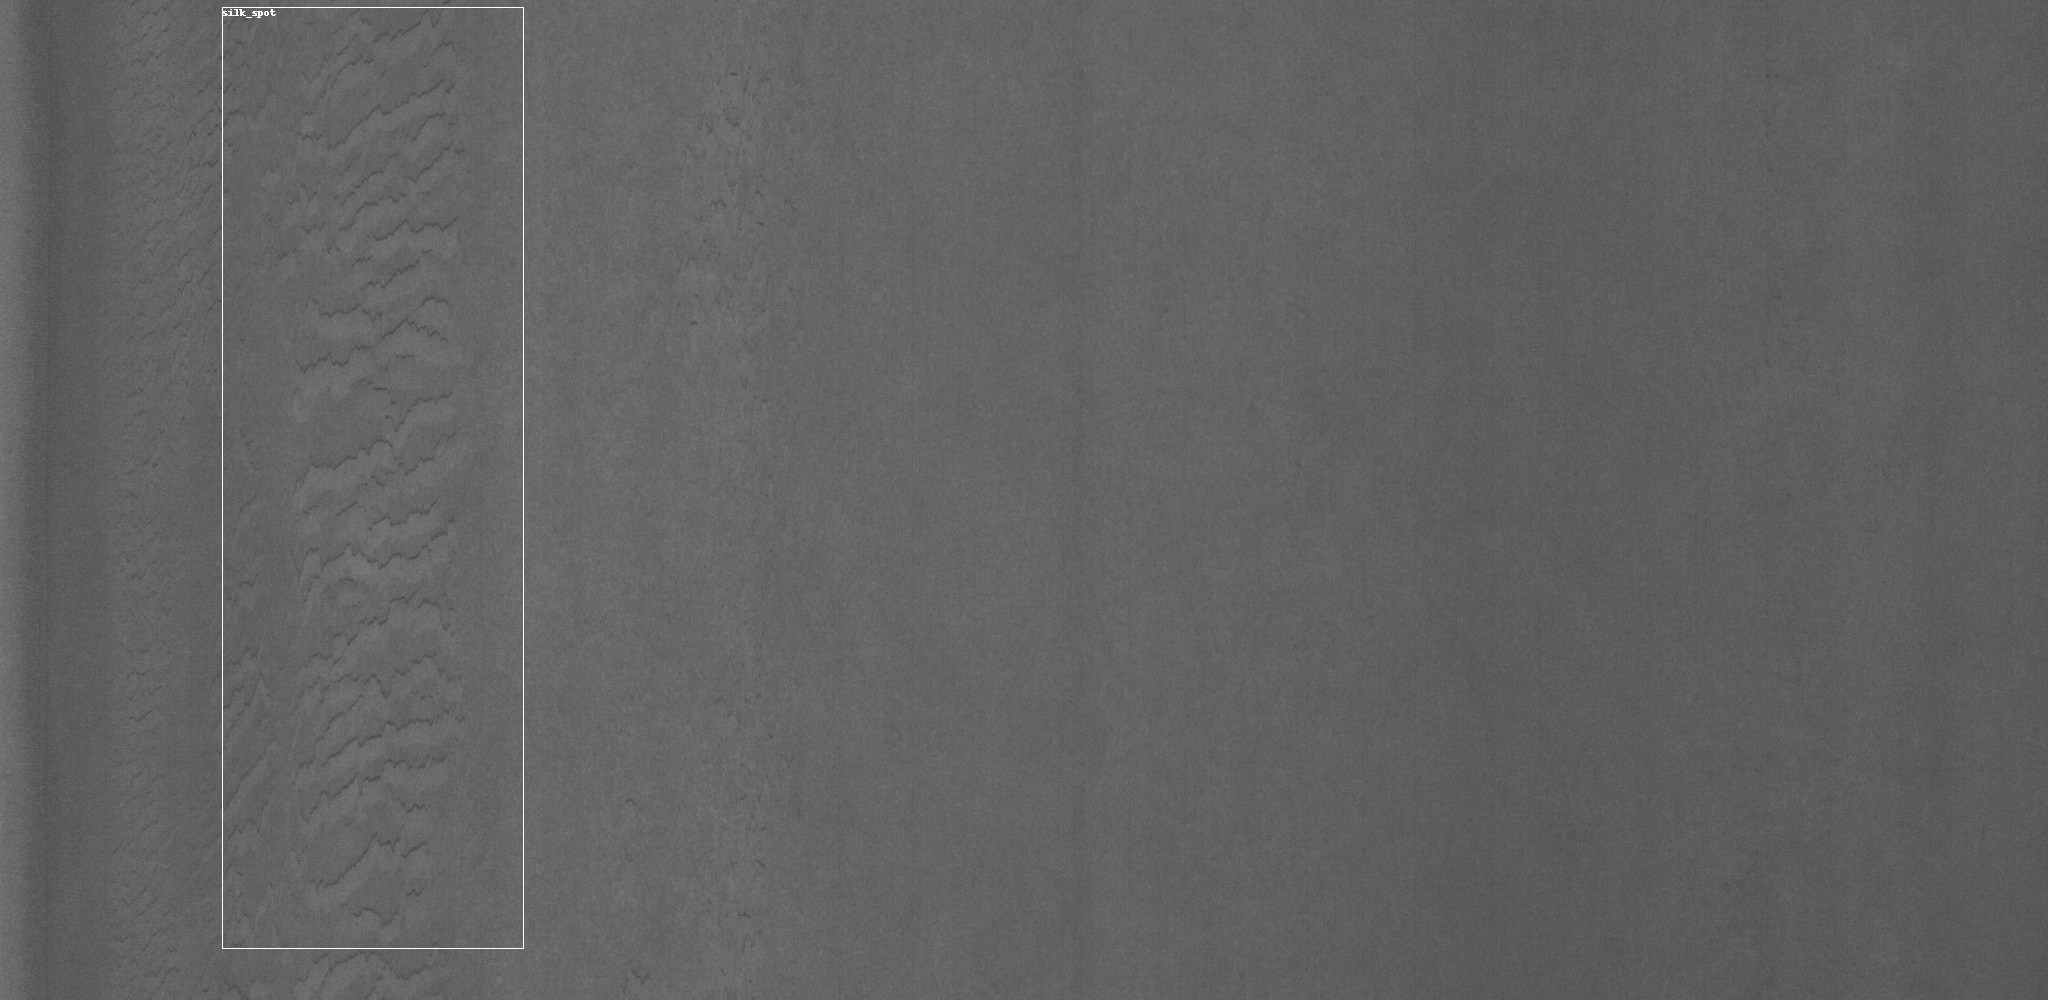

In [16]:
import numpy as np
from PIL import Image, ImageDraw

image_ids = train_dataset.coco.getImgIds()
image_id = image_ids[np.random.randint(0, len(image_ids))]

#image_id = 723
print('Image n°{}'.format(image_id))
image = train_dataset.coco.loadImgs(image_id)[0]
image = Image.open(os.path.join(train_directory, image['file_name']))

annotations = train_dataset.coco.imgToAnns[image_id]
draw = ImageDraw.Draw(image)

cats = train_dataset.coco.cats
id2label = {k: v['name'] for k,v in cats.items()}
#print(id2label)

for annotation in annotations:
    box = annotation['bbox']
    class_idx = annotation['category_id']
    x,y,w,h = tuple(box)
    print(x,y,w,h)
    draw.rectangle((x,y,x+w,y+h), outline='white', width=1)
    draw.text((x, y), id2label[class_idx], fill='white')

image

In [17]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    pixel_values = [item[0] for item in batch]
    encoding = processor.pad(pixel_values, return_tensors="pt")
    labels = [item[1] for item in batch]
    batch = {}
    batch['pixel_values'] = encoding['pixel_values']
    batch['pixel_mask'] = encoding['pixel_mask']
    batch['labels'] = labels
    return batch

train_dataloader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=2, shuffle=True)
test_dataloader = DataLoader(test_dataset, collate_fn=collate_fn, batch_size=2)
val_dataloader = DataLoader(val_dataset, collate_fn=collate_fn, batch_size=2)


In [18]:
batch = next(iter(train_dataloader))

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [19]:
pixel_values, target = train_dataset[0]
pixel_values

tensor([[[-1.9980, -2.0152, -2.0152,  ...,  0.2111,  0.1768,  0.1426],
         [-1.9809, -1.9809, -1.9809,  ...,  0.1939,  0.1597,  0.2111],
         [-1.9980, -1.9809, -1.9809,  ...,  0.1939,  0.1939,  0.1597],
         ...,
         [-1.9295, -1.9467, -1.9467,  ...,  0.2282,  0.2111,  0.1939],
         [-1.9295, -1.9467, -1.9467,  ...,  0.1768,  0.1939,  0.1768],
         [-1.9467, -1.9638, -1.9638,  ...,  0.1939,  0.1939,  0.1768]],

        [[-1.9132, -1.9307, -1.9307,  ...,  0.3452,  0.3102,  0.2752],
         [-1.8957, -1.8957, -1.8957,  ...,  0.3277,  0.2927,  0.3452],
         [-1.9132, -1.8957, -1.8957,  ...,  0.3277,  0.3277,  0.2927],
         ...,
         [-1.8431, -1.8606, -1.8606,  ...,  0.3627,  0.3452,  0.3277],
         [-1.8431, -1.8606, -1.8606,  ...,  0.3102,  0.3277,  0.3102],
         [-1.8606, -1.8782, -1.8782,  ...,  0.3277,  0.3277,  0.3102]],

        [[-1.6824, -1.6999, -1.6999,  ...,  0.5659,  0.5311,  0.4962],
         [-1.6650, -1.6650, -1.6650,  ...,  0

In [20]:
print(target)

{'size': tensor([ 651, 1333]), 'image_id': tensor([0]), 'class_labels': tensor([2]), 'boxes': tensor([[0.8999, 0.8995, 0.1025, 0.1870]]), 'area': tensor([16639.5703]), 'iscrowd': tensor([0]), 'orig_size': tensor([1000, 2048])}


In [21]:
!pip install -q pytorch-lightning


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pytorch_lightning as pl
from transformers import DetrForObjectDetection
import torch

class Detr(pl.LightningModule):
    def __init__(self, lr, lr_backbone, weight_decay):
        super().__init__()
        self.model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50",revision="no_timm",
                                                             num_labels=len(id2label),
                                                             ignore_mismatched_sizes=True)
        self.lr = lr
        self.lr_backbone = lr_backbone
        self.weight_decay = weight_decay
        
        self.train_losses = []
        self.val_losses = []
        

    def forward(self, pixel_values, pixel_mask):
        outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask)

        return outputs

    def common_step(self, batch, batch_idx):
        pixel_values = batch["pixel_values"]
        pixel_mask = batch["pixel_mask"]
        labels = [{k: v.to(self.device) for k, v in t.items()} for t in batch["labels"]]
        
        outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask, labels=labels)
        
        loss = outputs.loss
        loss_dict = outputs.loss_dict

        return loss, loss_dict

    def training_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        #print('batch', batch, batch.shape)
        self.log("training_loss", loss, batch_size=2)
        for k,v in loss_dict.items():
            #print(k, v)
            self.log("train_" + k, v.item(), batch_size=2)
        self.train_losses.append(loss.item())

        return loss

    def validation_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        
        self.log("validation_loss", loss, batch_size=2)
        for k,v in loss_dict.items():
            #print(k, v)
            self.log("validation_" + k, v.item(), batch_size=2)
            
        self.val_losses.append(loss.item()) 

        return loss

    def configure_optimizers(self):
        param_dicts = [
              {"params": [p for n, p in self.named_parameters() if "backbone" not in n and p.requires_grad]},
              {
                  "params": [p for n, p in self.named_parameters() if "backbone" in n and p.requires_grad],
                  "lr": self.lr_backbone,
              },
        ]
        optimizer = torch.optim.AdamW(param_dicts, lr=self.lr,
                                  weight_decay=self.weight_decay)
        return optimizer

    def train_dataloader(self):
        return train_dataloader

    def val_dataloader(self):
        return val_dataloader

#     def plot_losses(self):
#         plt.plot(self.train_losses, label="Training Loss")
#         plt.plot(self.val_losses, label="Validation Loss")
#         plt.xlabel("Epoch")
#         plt.ylabel("Loss")
#         plt.title("Training and Validation Losses")
#         plt.legend()
#         plt.show()

In [ ]:
# !pip show tensorboard

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir lightning_logs/

In [22]:
model = Detr(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)


outputs = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DetrForObjectDetection were not initialized from the model checkpoint at facebook/detr-resnet-50 and are newly initialized because the shapes did not match:
- class_labels_classifier.weight: found shape torch.Size([92, 256]) in the checkpoint and torch.Size([11, 256]) in the model instantiated
- class_labels_classifier.bias: found shape torch.Size([92]) in the checkpoint and torch.Size([11]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
# outputs.logits.shape
from pytorch_lightning.callbacks import EarlyStopping

# Создание экземпляра колбэка EarlyStopping
early_stop_callback = EarlyStopping(
    monitor='validation_loss', 
    patience=20,          
    verbose=True,  
    mode='min'        
)

In [24]:
from pytorch_lightning import Trainer

trainer = Trainer(devices = 1, accelerator = "gpu", gradient_clip_val = 0.1, callbacks=[early_stop_callback]) #, accumulate_grad_batches=8)#c
trainer.fit(model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\loops\utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                   | Params
-------------------------------------------------
0 | model | DetrForObjectDetection | 41.5 M
-------------------------------------------------
18.0 M    Trainable params
23.5 M    Non-trainable params
41.5 M    Total params
166.016   Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
C:\Users\Student\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved. New best score: 1.922


Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.096 >= min_delta = 0.0. New best score: 1.826


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.192 >= min_delta = 0.0. New best score: 1.633


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.029 >= min_delta = 0.0. New best score: 1.604


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.034 >= min_delta = 0.0. New best score: 1.570


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.010 >= min_delta = 0.0. New best score: 1.560


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.053 >= min_delta = 0.0. New best score: 1.507


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.020 >= min_delta = 0.0. New best score: 1.486


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.029 >= min_delta = 0.0. New best score: 1.458


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.009 >= min_delta = 0.0. New best score: 1.448


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.006 >= min_delta = 0.0. New best score: 1.442


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.018 >= min_delta = 0.0. New best score: 1.425


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.033 >= min_delta = 0.0. New best score: 1.391


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.000 >= min_delta = 0.0. New best score: 1.391


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.016 >= min_delta = 0.0. New best score: 1.376


Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.014 >= min_delta = 0.0. New best score: 1.361


Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.007 >= min_delta = 0.0. New best score: 1.355


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.029 >= min_delta = 0.0. New best score: 1.326


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.017 >= min_delta = 0.0. New best score: 1.309


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.001 >= min_delta = 0.0. New best score: 1.308


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.007 >= min_delta = 0.0. New best score: 1.301


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.015 >= min_delta = 0.0. New best score: 1.286


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Metric validation_loss improved by 0.015 >= min_delta = 0.0. New best score: 1.271


Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Monitored metric validation_loss did not improve in the last 20 records. Best score: 1.271. Signaling Trainer to stop.


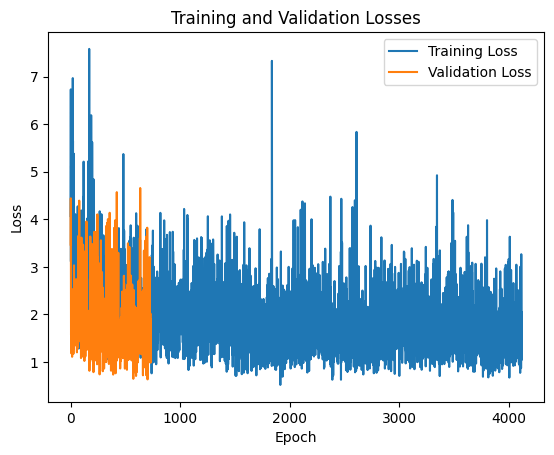

In [26]:
len(model.train_losses), len(model.val_losses)

(137608, 24384)

[1.27378912 1.25986404 1.25884049 1.26244848 1.26930386 1.25207378
 1.26486273 1.28246007 1.28350941 1.27176196 1.23590313 1.27445098
 1.28305315 1.28536585 1.28246026 1.27192587 1.26617613 1.24912673
 1.26426614 1.27237598 1.24923376 1.25375421 1.27215053 1.24539412
 1.23871206 1.25428285 1.24532266 1.24609963 1.27572099 1.28147461
 1.27161111 1.26571792 1.24091881 1.27875908 1.27198034 1.26293712
 1.23601708 1.26521962 1.24282908 1.25642376 1.23597447 1.2535255
 1.25166997 1.2677752  1.28690891 1.28465349 1.28047717 1.28775166
 1.26064418 1.27298483 1.27132572 1.26239553 1.25950631 1.26276584
 1.24779963 1.25610893 1.25064853 1.27916554 1.26576466 1.27123392
 1.23668541 1.22982688 1.27252732 1.26776043 1.25224884 1.2442268
 1.26705353 1.2444875  1.23574978 1.25548288 1.2474162  1.2524643
 1.25345343 1.24473312 1.27887521 1.26503289 1.26819172 1.23300051
 1.23327479 1.24396738 1.24868505 1.27670876 1.25119665 1.22168169
 1.25971318 1.24670867 1.25254702 1.27550975 1.280496   1.2592282

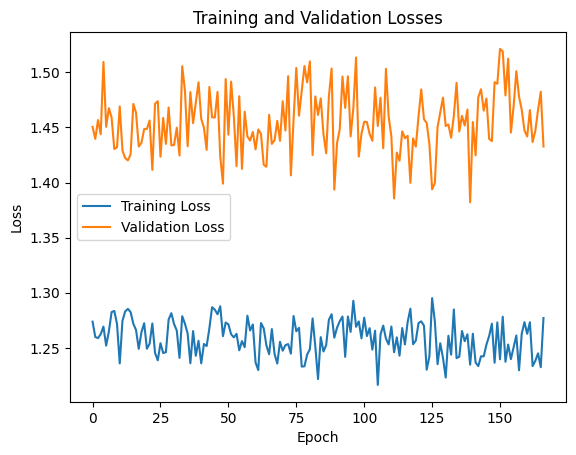

In [27]:
import matplotlib.pyplot as plt
tr = np.array(model.train_losses)
averaged_tr = np.mean(tr.reshape(-1, 824, 167), axis=1)
averaged_tr = np.squeeze(averaged_tr)
print(averaged_tr)
plt.plot(averaged_tr, label="Training Loss")
vl = np.array(model.val_losses)
vl = vl[2:]
averaged_vl = np.mean(vl.reshape(-1, 146, 167), axis=1)
averaged_vl = np.squeeze(averaged_vl)
print(averaged_vl)
plt.plot(averaged_vl, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Losses")
plt.legend()
plt.show()

In [28]:
# model_path = 'custom_model'
# model.model.save_pretrained(model_path)

# model = DetrForObjectDetection.from_pretrained(model_path)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)
model.eval()

Detr(
  (model): DetrForObjectDetection(
    (model): DetrModel(
      (backbone): DetrConvModel(
        (conv_encoder): DetrConvEncoder(
          (model): ResNetBackbone(
            (embedder): ResNetEmbeddings(
              (embedder): ResNetConvLayer(
                (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                (normalization): DetrFrozenBatchNorm2d()
                (activation): ReLU()
              )
              (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
            )
            (encoder): ResNetEncoder(
              (stages): ModuleList(
                (0): ResNetStage(
                  (layers): Sequential(
                    (0): ResNetBottleNeckLayer(
                      (shortcut): ResNetShortCut(
                        (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                        (normalization): DetrFrozenBatchNorm2d

In [30]:
!pip install -q coco-eval


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
def convert_to_xywh(boxes):
    xmin, ymin, xmax, ymax = boxes.unbind(1)
    return torch.stack((xmin, ymin, xmax - xmin, ymax - ymin), dim=1)

def prepare_for_coco_detection(predictions):
    coco_results = []
    for original_id, prediction in predictions.items():
        if len(prediction) == 0:
            continue

        boxes = prediction["boxes"]
        boxes = convert_to_xywh(boxes).tolist()
        scores = prediction["scores"].tolist()
        labels = prediction["labels"].tolist()

        coco_results.extend(
            [
                {
                    "image_id": original_id,
                    "category_id": labels[k],
                    "bbox": box,
                    "score": scores[k],
                }
                for k, box in enumerate(boxes)
            ]
        )
    return coco_results

In [30]:
from coco_eval import CocoEvaluator
from tqdm.notebook import tqdm

import numpy as np

def mAP(class_of_interest):
    evaluator = CocoEvaluator(coco_gt=test_dataset.coco, iou_types=["bbox"])

    for idx, batch in enumerate(tqdm(test_dataloader)):
        pixel_values = batch["pixel_values"].to(device)
        pixel_mask = batch["pixel_mask"].to(device)
        labels = [{k: v.to(device) for k, v in t.items()} for t in batch["labels"]]
        transformed_labels = []
        class_labels, boxes, iscrowd = [], [], []
    
        for t in batch["labels"]:
            if class_of_interest in t['class_labels']:
                for i in torch.where(t['class_labels'] == class_of_interest):
                    class_labels.append(class_of_interest)
                    boxes.append(t['boxes'][i])
                    iscrowd.append(t['iscrowd'][i])
                    
                new_item = {'size': t['size'].to(device),
                            'image_id': t['image_id'].to(device),
                            'class_labels':t['class_labels'].to(device),
                           'boxes': t['boxes'].to(device),
                            'area': t['area'].to(device),
                            'iscrowd':t['iscrowd'].to(device),
                            'orig_size': t['orig_size'].to(device)}
                transformed_labels.append(new_item)
    
        if transformed_labels != []:
            with torch.no_grad():
                outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)
        
            orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
            results = processor.post_process_object_detection(outputs, target_sizes=orig_target_sizes, threshold=0)
        
            predictions = {target['image_id'].item(): output for target, output in zip(transformed_labels, results)}
            predictions = prepare_for_coco_detection(predictions)
        
            evaluator.update(predictions)
    
    evaluator.synchronize_between_processes()
    evaluator.accumulate()
    evaluator.summarize()

for j in range(10):
    print(classes[j])
    mAP(j)


punching_hole


  0%|          | 0/171 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.07s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.323
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.227
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.143
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.189
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.345
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.355
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.302
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

  0%|          | 0/171 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.06s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.115
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.239
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.107
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.032
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.115
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.229
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.311
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.328
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.134
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

  0%|          | 0/171 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.06s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.125
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.346
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.076
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.296
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.192
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.303
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.331
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.362
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= 

  0%|          | 0/171 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.04s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.111
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.315
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.027
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.169
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.131
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.237
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.257
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.138
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= 

  0%|          | 0/171 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.04s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.054
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.104
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.184
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.197
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.124
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= 

  0%|          | 0/171 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.05s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.039
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.107
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.026
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.056
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.061
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.178
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= 

  0%|          | 0/171 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.03s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.062
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.053
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.046
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.079
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.104
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.114
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.046
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

  0%|          | 0/171 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.239
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.526
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.168
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.239
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.145
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.412
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.421
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

  0%|          | 0/171 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.035
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.096
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.035
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.057
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.271
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.286
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

  0%|          | 0/171 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.235
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.433
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.235
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.353
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.541
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.624
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area

In [31]:
evaluator = CocoEvaluator(coco_gt=test_dataset.coco, iou_types=["bbox"])

for idx, batch in enumerate(tqdm(test_dataloader)):
    pixel_values = batch["pixel_values"].to(device)
    pixel_mask = batch["pixel_mask"].to(device)
    labels = [{k: v.to(device) for k, v in t.items()} for t in batch["labels"]]

    with torch.no_grad():
        outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

    orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
    results = processor.post_process_object_detection(outputs, target_sizes=orig_target_sizes, threshold=0)

    predictions = {target['image_id'].item(): output for target, output in zip(labels, results)}
    predictions = prepare_for_coco_detection(predictions)

    evaluator.update(predictions)

evaluator.synchronize_between_processes()
evaluator.accumulate()
evaluator.summarize()

  0%|          | 0/171 [00:00<?, ?it/s]

Accumulating evaluation results...
DONE (t=0.20s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.371
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.100
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.150
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.163
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.236
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.398
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.463
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.259
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

In [32]:
import torch
import matplotlib.pyplot as plt

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b
def plot_results(pil_img, prob, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        cl = p.argmax()
        text = f'{id2label[cl.item()]}: {p[cl]:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [33]:
def visualize_predictions(image, outputs, threshold=0.1, keep_highest_scoring_bbox=False):
    # keep only predictions with confidence >= threshold
    probas = outputs.logits.softmax(-1)[0, :, :-1]
    keep = probas.max(-1).values > threshold
    if keep_highest_scoring_bbox:
        keep = probas.max(-1).values.argmax()
        keep = torch.tensor([keep])

    # convert predicted boxes from [0; 1] to image scales
    bboxes_scaled = rescale_bboxes(outputs.pred_boxes[0, keep].cpu(), image.size)

    # plot results
    plot_results(image, probas[keep], bboxes_scaled)

In [34]:
it = iter(range(1500))

torch.Size([1, 3, 651, 1333])


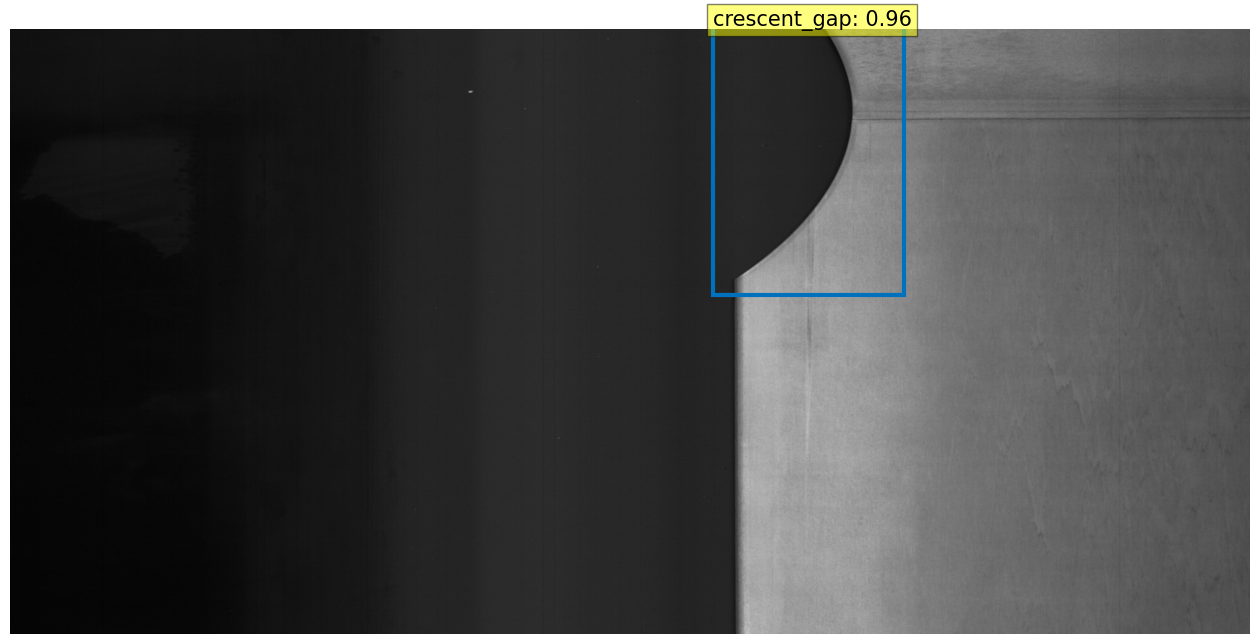

In [37]:
#We can use the image_id in target to know which image it is
pixel_values, target = test_dataset[next(it)]

pixel_values = pixel_values.unsqueeze(0).to(device)
print(pixel_values.shape)

# forward pass to get class logits and bounding boxes
outputs = model(pixel_values=pixel_values, pixel_mask=None)

image_id = target['image_id'].item()
image = test_dataset.coco.loadImgs(image_id)[0]
image = Image.open(os.path.join(f'C:\\Users\\Student\\Documents\\Diana\\test', image['file_name']))

visualize_predictions(image, outputs, threshold=0.3, keep_highest_scoring_bbox=True)